In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 41 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,208 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [1]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [13]:
# just used it if you want to upload a file 
from google.colab import files
import cv2
uploaded = files.upload()

Saving descarga.jpg to descarga (1).jpg


SystemError: ignored

# 1 image_to_string 


In [5]:
# download a image twit
!curl -o logo.jpg https://img.buzzfeed.com/buzzfeed-static/static/2017-10/2/14/campaign_images/buzzfeed-prod-fastlane-01/36-brutal-weird-and-funny-celebrity-tweets-to-mak-2-9367-1506970381-0_dblwide.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24693  100 24693    0     0   301k      0 --:--:-- --:--:-- --:--:--  301k


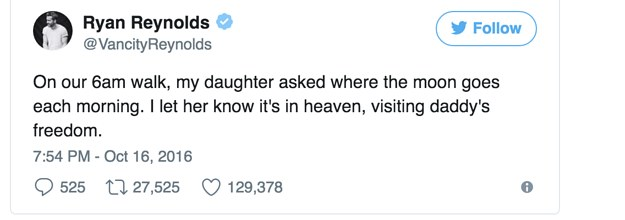

Ryan Reynolds

Follow )
@VancityReynolds a

   

On our 6am walk, my daughter asked where the moon goes
each morning. | let her know it's in heaven, visiting daddy's
freedom.

7:54 PM - Oct 16, 2016

© 525 11 27,525 © 129,378 e



In [61]:
from google.colab.patches import cv2_imshow
import cv2
ruta =  "/content/logo.jpg"
image_path_in_colab= ruta
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
img = cv2.imread(ruta, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
print(extractedInformation)

# 2 image_to_boxes and putText

Syntax: cv2.rectangle(image, start_point, end_point, color, thickness)


```
# Start coordinate, here (5, 5)
# represents the top left corner of rectangle
start_point = (5, 5)
  
# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (220, 220)
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
```
Using thickness of -1 px to fill the rectangle by black color

## putting the text 
cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

org: It is the coordinates of the bottom-left corner of the text string in the image. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).



# las cordenadas no estaban bien 
al parecer las cordendas no dadas por el metodo image_to_boxes no funciona bien ya que la nomnclatura (x,y,w,h) no esta bien dada asi que tuvimos que seguir el tutorial del video para corregir.

otra forma de solucionar el problema es usar  image_to_data para obtener las cordenadas de las cajas 
https://stackoverflow.com/questions/20831612/getting-the-bounding-box-of-the-recognized-words-using-python-tesseract

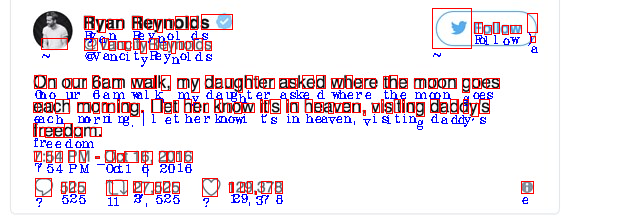

In [28]:
# Get bounding box estimates
boxes = pytesseract.image_to_boxes(Image.open(image_path_in_colab))
#print(img.shape) #(220, 625, 3)
img_h, img_w, p = img.shape

#print(type(boxes)) #<class 'str'>
for b in boxes.splitlines(): # this method create a list splited of lines 
  b = b.split(" ") # create a list of each data 
  x,y,x2,h= int(b[1]), int(b[2]), int(b[3]), int(b[4])
  cv2.rectangle(img, (x, img_h - y), (x2, img_h -h),(0,0,255),1)

  """put the caracter next to square """
  cv2.putText(img, b[0],(x, img_h - y+10), cv2.FONT_HERSHEY_COMPLEX, .4, (255,0,0),1) # +10 es para poner la letra debajo del cuadro 
cv2_imshow(img)



# 3 como imprimir solo un numeros o letras usando image_to_data



In [82]:
from pytesseract import Output
import numpy as np
""" Este codigo es sacado de la documentacion official y son comandos
    para lo consola que modificaran el backend de pytesseract
    por alguna razon no funcionaron 
"""
cong = r'--oem 3 --psm 6 outputbase digits' 
print(type(cong))
data = pytesseract.image_to_data(Image.open(image_path_in_colab), config= cong)
#print(type(data)) # str
#print(data)
# lets create a function to pass dict from str 
def str_to_dic(data):
  li = []
  for d in data.splitlines():
    d = d.split("\t")
    #print(d)
    li.append(d)
  dicto = {}
  arr = np.array(li[1:])
  arr = arr.T
  #print(arr)
  for i, l in enumerate(li[0]):
    dicto[str(l)] = arr[i]
  return dicto

data = str_to_dic(data)
print(data.keys())
print(len(data["text"]))
print(data["width"][4])
  

<class 'str'>
dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
59
40


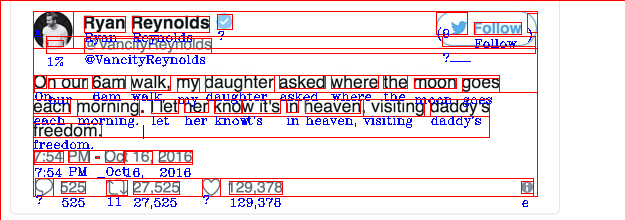

In [83]:
img = cv2.imread(ruta, cv2.IMREAD_UNCHANGED)
for t in range (len(data["text"])): 
  x,y,w,h= int(data["left"][t]), int(data["top"][t]), int(data["width"][t]), int(data["height"][t])
  cv2.rectangle(img, (x, y), (x+w, y+h),(0,0,255),1)

  """put the caracter next to square """
  cv2.putText(img, data["text"][t],(x, y+25), cv2.FONT_HERSHEY_COMPLEX, .4, (255,0,0),1) # +10 es para poner la letra debajo del cuadro 
cv2_imshow(img)

# PARTE 2: usanndo pytesseract para extraer texto de una captcha facil 
intentaremos copiar el texto de esta imagen.

Here's a simple approach using OpenCV and Pytesseract OCR. To perform OCR on an image, its important to preprocess the image. The idea is to obtain a processed image where the text to extract is in black with the background in white. To do this, we can convert to grayscale, apply a slight Gaussian blur, then Otsu's threshold to obtain a binary image. From here, we can apply morphological operations to remove noise. Finally we invert the image. We perform text extraction using the --psm 6 configuration option to assume a single uniform block of text. Take a look here for more options.

https://stackoverflow.com/questions/37745519/use-pytesseract-ocr-to-recognize-text-from-an-image

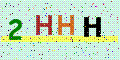

In [107]:
# download a captcha
!curl -o 1.png https://i.stack.imgur.com/XZ8xg.png
!curl -o 2.png https://supporthost.com/wp-content/uploads/2021/12/captcha-with-characters.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9895  100  9895    0     0  75534      0 --:--:-- --:--:-- --:--:-- 75534
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9966  100  9966    0     0  66885      0 --:--:-- --:--:-- --:--:-- 66885


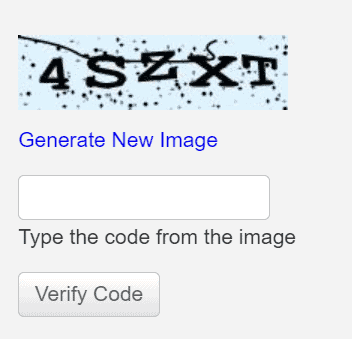

result of captcha before image preprossesing: Generate New Image
Type the code from the image
Verify Code



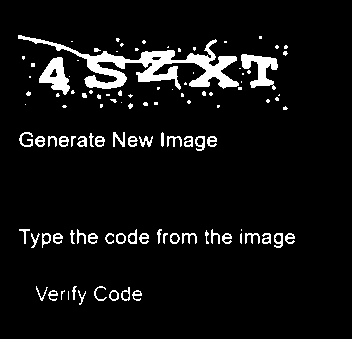

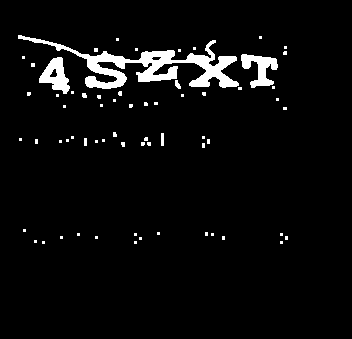

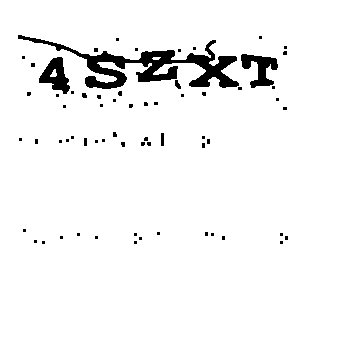

result of captcha after image preprossesing: 


In [108]:
import cv2

# Grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('/content/2.png')
cv2_imshow(image)
data = pytesseract.image_to_string(image, lang='eng', config='--psm 6')
print("result of captcha before image preprossesing: {}".format(data))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')

cv2_imshow(thresh)
cv2_imshow(opening)
cv2_imshow(invert)

print("result of captcha after image preprossesing: {}".format(data))

